# taq_self_response_year_avg_time_shift_plot

#### Juan Camilo Henao Londono - 26.06.2019
#### AG Guhr - Universitaet Duisburg-Essen

In the following [link]() can be seen the plot of the function's results

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt
import os

import pickle

import taq_data_tools

In [2]:
def taq_self_response_year_avg_time_shift_plot(ticker, year, taus):
    """
    Plot the average cross response during a year and the dayly cross-response
    contributions in a figure. The data is loaded from the cross response data
    results.
        :param ticker: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
    """

    try:

        function_name = taq_self_response_year_avg_time_shift_plot.__name__
        taq_data_tools.taq_function_header_print_plot(function_name, ticker,
                                                      ticker, year, '', '')

        figure = plt.figure(figsize=(9, 16))

        for tau_idx, tau_val in enumerate(taus):

            ax = plt.subplot(len(taus), 1, tau_idx + 1)

            times = np.array(range(- 10 * tau_val, 10 * tau_val, 1))
            self = pickle.load(open(''.join((
                               '../../taq_data/time_shift_data_{1}/taq_self'
                               + '_response_year_time_shift_data_tau_{2}/taq_self'
                               + '_response_year_time_shift_data_tau_{2}_{1}'
                               + '_{0}.pickle').split())
                               .format(ticker, year, tau_val), 'rb'))

            ax.plot(times, self, linewidth=5, label=r'{}'.format(ticker))
            ax.legend(loc='best', fontsize=15)
            ax.set_title(r'$\tau$ = {}'.format(tau_val), fontsize=20)
            ax.set_xlabel(r'Time shift $[s]$', fontsize=15)
            ax.set_ylabel(r'$R_{ii}(\tau)$', fontsize=15)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            ax.grid(True)
            plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
            plt.tight_layout()

        # Plotting
        taq_data_tools.taq_save_plot(function_name, figure, ticker, ticker,
                                     year, '')

        return None

    except FileNotFoundError as e:
        print('No data')
        print()
        return None

TAQ data
taq_self_response_year_avg_time_shift_plot
Processing plot for the stock AAPL the 2008..
Plot saved

TAQ data
taq_self_response_year_avg_time_shift_plot
Processing plot for the stock MSFT the 2008..
Plot saved



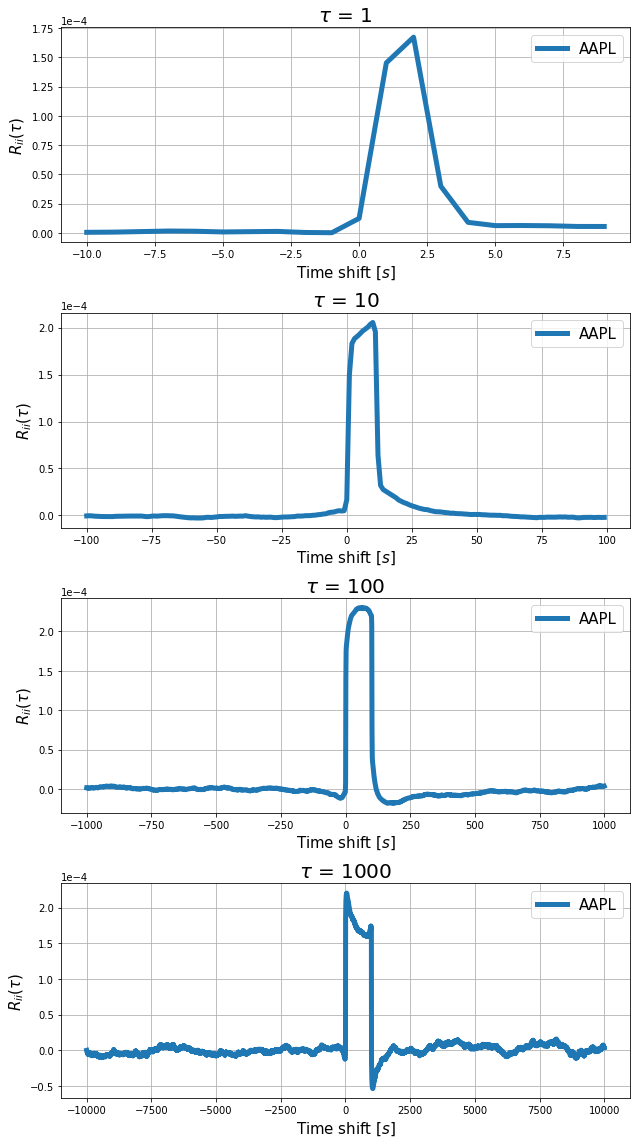

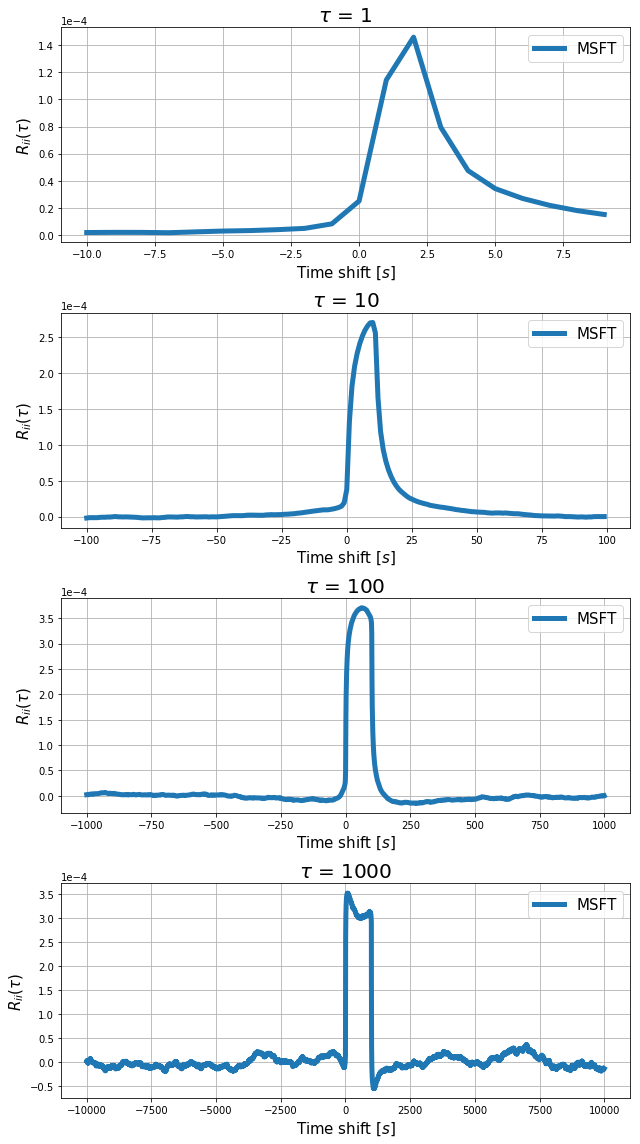

In [3]:
# Test

tickers = ['AAPL', 'MSFT']
year = '2008'
taus = [1, 10, 100, 1000]

for ticker in tickers:
    taq_self_response_year_avg_time_shift_plot(ticker, year, taus)